In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [6]:
data=pd.read_csv("USA_Housing.csv")
data.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [7]:
data.shape

(5000, 7)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [9]:
data.drop('Address', axis=1, inplace=True)

In [10]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [11]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


<Axes: >

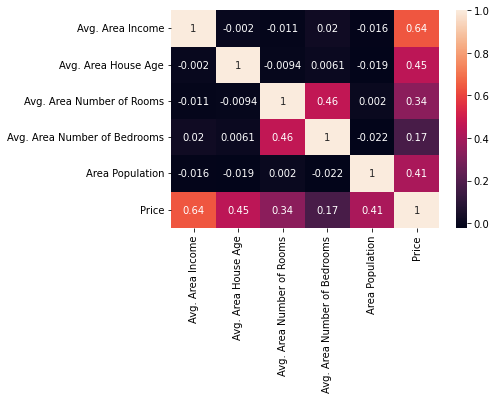

In [12]:
sns.heatmap(data.corr(),annot=True)

In [13]:
x=data[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']]
Y=data['Price']

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X=sc.fit_transform(x)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=101)
from sklearn.linear_model import LinearRegression


model=LinearRegression()
model.fit(x_train,y_train)




LinearRegression()

In [16]:
s1=model.score(x_train,y_train)
s2=model.score(x_test,y_test)
print("Training Performance : ",s1)
print("Testing Performance : ",s2)

Training Performance :  0.9171466248766579
Testing Performance :  0.9211719165402021


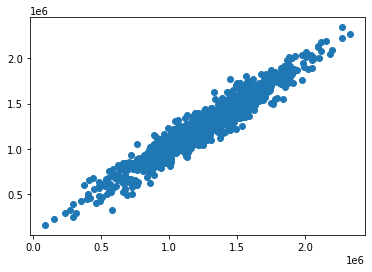

In [17]:
p=model.predict(x_test)
#Plotting the prediction against target variable
plt.scatter(y_test,p)

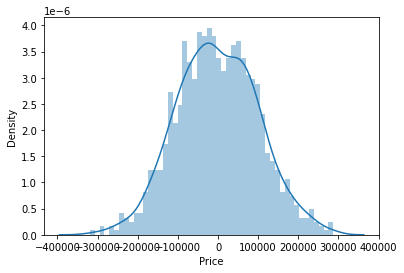

In [18]:
sns.distplot((y_test-p),bins=50);

In [19]:
res=pd.DataFrame({'ActualPrice':y_test,'PredictedPrice':p})
print(res.head())

       ActualPrice  PredictedPrice
1718  1.251689e+06    1.257920e+06
2511  8.730483e+05    8.221124e+05
345   1.696978e+06    1.740669e+06
2521  1.063964e+06    9.724521e+05
54    9.487883e+05    9.934223e+05


In [20]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

mse=mean_squared_error(y_test,p)
mae=mean_absolute_error(y_test,p)
print("Mean Squared Error : ",mse)
print("Mean Absolute Error : ",mae)

Mean Squared Error :  10100187858.867586
Mean Absolute Error :  81305.23300086225


In [21]:
i=float(input("Enter Average Area Income: "))
a=float(input("Enter Average House Age: "))
r=float(input("Enter number of rooms: "))
br=float(input("Enter number of bredrooms: "))
p=float(input("Enter Average Area of Population : "))
print("The predicted House Price is : ",round(float(model.predict([[i,a,r,br,p]])[0]),2))

Enter Average Area Income: 30000
Enter Average House Age: 400
Enter number of rooms: 6
Enter number of bredrooms: 3
Enter Average Area of Population : 5000
The predicted House Price is :  63954670532.28
